## Project Definiion

To predict the programs our user are likely to enjoy and make recommendations based on the prediction

## Data Description


ViewsID	 	- a unique identifier for each view entry
CustomerID 		- the customer’s ID
Name 			- the customer’s name
State 			- the customer’s state of residence
Age 			- the customer’s age
Gender 		- the customer’s gender
Genre 		- the genre of the program
Format 		- the format of the program
Device 		- the medium used to view the program
Viewing_Frequency     - the number of views per week
Total_Viewing_Time    - the total viewing time in seconds view per week
Rating 		          - the customer’s rating of the program
Duration		      - the duration of the subscription in months
Plan	 		     -  the subscription plan
Monthly_Cost	      - the cost of subscription per month



In [681]:
# Import necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [682]:
 ##Load the dataset
TvData = pd.read_csv('data/MavTv.csv')
TvData.head()

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating
0,1,Jelani Sofoluwe,35,Male,Akwa,Religion,TV-Shows,Decoder,4,72777,Basic,2500,4,4
1,2,Lee Balarabe,66,Male,Jigawa,Comedy,Live-Events,Tv-App,5,251472,Premium,5000,1,2
2,3,Lawrence Akinde,64,Male,Plateau,Comedy,TV-Shows,Tv-App,11,137732,Premium,5000,3,4
3,4,Freya Ajudua,58,Male,Niger,Sports,TV-Shows,Tv-App,2,105950,Elite,10000,12,2
4,5,Declan Ujah,57,Male,Akwa,Music,Live-Events,Browser,7,464270,Premium,5000,2,3


In [807]:
TvData['Plan'].unique()

['Basic', 'Premium', 'Elite']
Categories (3, object): ['Basic', 'Premium', 'Elite']

In [683]:
# Get a concise summary of features in the dataset
TvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          5000 non-null   int64 
 1   Name                5000 non-null   object
 2   Age                 5000 non-null   int64 
 3   Gender              5000 non-null   object
 4   State               5000 non-null   object
 5   Genre               5000 non-null   object
 6   Format              5000 non-null   object
 7   Device              5000 non-null   object
 8   Viewing_Frequency   5000 non-null   int64 
 9   Total_Viewing_Time  5000 non-null   int64 
 10  Plan                5000 non-null   object
 11  Monthly_Cost        5000 non-null   int64 
 12  Duration            5000 non-null   int64 
 13  Rating              5000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 547.0+ KB


In [684]:
# Check for missing values
TvData.isna().count()

CustomerID            5000
Name                  5000
Age                   5000
Gender                5000
State                 5000
Genre                 5000
Format                5000
Device                5000
Viewing_Frequency     5000
Total_Viewing_Time    5000
Plan                  5000
Monthly_Cost          5000
Duration              5000
Rating                5000
dtype: int64

In [685]:
# Get statistical summary of dataset
TvData.describe()

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1495.723800,46.620600,5.479800,298835.144000,5629.500000,6.471800,3.013200
std,867.395992,16.568209,3.214227,177674.372424,2713.199595,3.150808,1.234071
min,1.000000,18.000000,0.000000,6.000000,2500.000000,1.000000,1.000000
25%,741.750000,32.000000,3.000000,140919.500000,5000.000000,4.000000,2.000000
50%,1495.000000,47.000000,5.000000,295446.500000,5000.000000,6.000000,3.000000
75%,2250.000000,61.000000,8.000000,454118.250000,5000.000000,9.000000,4.000000
max,3000.000000,75.000000,11.000000,604790.000000,10000.000000,12.000000,5.000000


In [686]:
# Check for duplicates
TvData.duplicated().sum()

0

## Exploratory Data Analysis

In [687]:
# Get column list
TvData.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format',
       'Device', 'Viewing_Frequency', 'Total_Viewing_Time', 'Plan',
       'Monthly_Cost', 'Duration', 'Rating'],
      dtype='object')

#### In-depth check for duplicate entries

In [688]:
# # Exclude the 'Viewing_Frequency' and 'Total_Viewing_Time' features to really find duplicates
# sub_data = TvData[['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format', 'Device',
#             'Plan', 'Monthly_Cost', 'Duration', 'Rating']]

# sub_data.head()

In [689]:
# # Get index of duplicate rows
# duplicates = sub_data[sub_data.duplicated()]
# duplicates.index

# # Drop duplicate rows by index
# TvData.drop(index=duplicates.index,inplace=True, axis=0)

In [741]:
# Exclude the 'Viewing_Frequency' and 'Total_Viewing_Time' features to really find duplicates
data_subset = ['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format', 'Device',
               'Plan', 'Monthly_Cost', 'Duration', 'Rating']

TvData.drop_duplicates(subset=data_subset, keep='last', inplace=True)

# Reset index of dataset
TvData.reset_index(drop=True, inplace=True)

In [691]:
# Check dataset shape (rows, columns)
TvData.shape

(4992, 14)

In [692]:
# cat_features = ['Gender', 'Genre', 'State','Format','Device','Plan', 'Rating']
cat_features = ['Gender', 'Genre', 'State','Format','Device','Plan']

#  Numerical features in dataset
num_features=['Duration', 'Total_Viewing_Time', 'Viewing_Frequency', 'Age']

## Univariate Analysis

###### Check for errors in values

In [693]:
# Unique values in State feature
TvData['State'].unique()

array(['Akwa', 'Jigawa', 'Plateau', 'Niger', 'Gombe', 'Anambra', 'Oyo',
       'Borno', 'Katsina', 'River', 'Sokoto', 'Bauchi', 'Adamawa',
       'Lagos', 'Enugu', 'Kogi', 'Imo', 'Ebonyi', 'Kwara', 'Cross',
       'Kano', 'Ogun', 'Taraba', 'Yobe', 'Kaduna', 'Benue', 'Ekiti',
       'Osun', 'Delta', 'Rivers', 'Nasarawa', 'Bayelsa', 'Kebbi', 'Ondo',
       'Edo', 'Abia', 'Ibom', 'Zamfara'], dtype=object)

In [694]:
# Correct errors in the State feature data
TvData['State'] = TvData['State'].replace({'Akwa':'Akwa Ibom', 'River':'Rivers', 'Ibom':'Abuja', 'Cross': 'Cross River'})

In [695]:
# Unique values in 'Viewing Frequency' feature
TvData['Viewing_Frequency'].unique()

array([ 4,  5, 11,  2,  7,  6,  1, 10,  8,  9,  3,  0], dtype=int64)

In [696]:
TvData[TvData['Viewing_Frequency'] == 0].head()

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating
64,65,Stewart Sofoluwe,46,Male,Anambra,Action,Live-Events,Decoder,0,521660,Basic,2500,7,3
97,98,Neville Aremu,26,Male,Adamawa,Sports,Live-Events,Tv-App,0,313019,Premium,5000,2,3
111,112,Jade Abagun,52,Male,Enugu,Drama,TV-Shows,Tv-App,0,177220,Premium,5000,1,1
145,146,Kasper Oteh,43,Male,Katsina,Music,TV-Shows,Tv-App,0,91869,Basic,2500,8,5
155,156,Brooke Onyeama,41,Male,Ebonyi,Sports,Live-Events,Tv-App,0,5549,Basic,2500,7,3


In [697]:
TvData[TvData['Viewing_Frequency'] == 0].describe()

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
count,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000
mean,1515.381579,46.315789,0.0,301787.267544,5339.912281,6.618421,3.109649
std,854.105096,15.896037,0.0,180452.334983,2606.672899,3.065944,1.202528
min,37.000000,18.000000,0.0,1652.000000,2500.000000,1.000000,1.000000
25%,741.750000,32.750000,0.0,131296.750000,2500.000000,4.000000,2.000000
50%,1520.000000,48.000000,0.0,305005.500000,5000.000000,7.000000,3.000000
75%,2284.250000,60.000000,0.0,458805.500000,5000.000000,9.000000,4.000000
max,2993.000000,75.000000,0.0,604135.000000,10000.000000,12.000000,5.000000


In [698]:
# TvData[TvData['Total_Viewing_Time'] < 140]

###### Check for outliers in the numerical columns

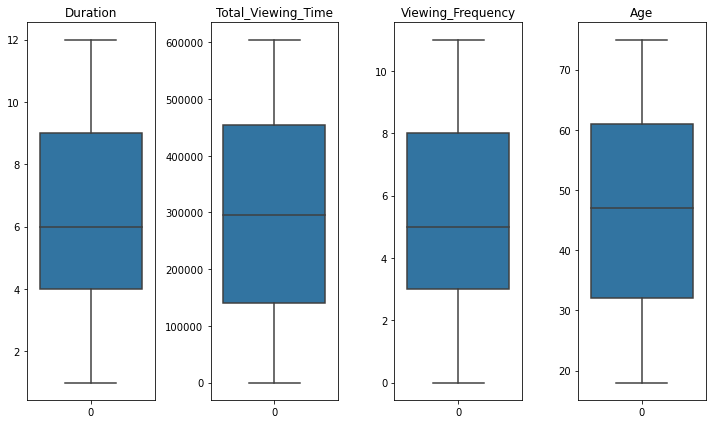

In [699]:
fig, axes = plt.subplots(ncols=len(num_features), figsize=(10, 6))

# Create boxplots with Seaborn
for column, axis in zip(num_features, axes):
        sns.boxplot(data=TvData[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

###### See data distribution in numerical features

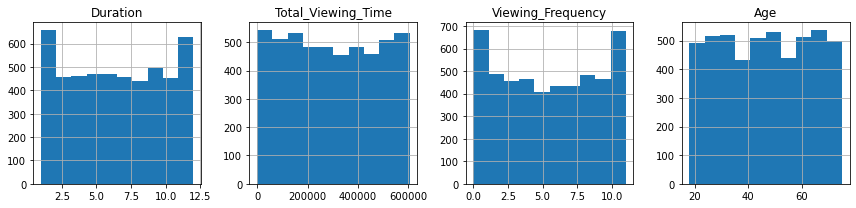

In [700]:
fig, axes = plt.subplots(ncols=len(num_features), figsize=(12, 3))

# Create histograms
for column, axis in zip(num_features, axes):
        TvData[column].hist(ax=axis)
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

In [701]:
# Subscriber engagement per device
TvData['Device'].value_counts()

Decoder       1671
Tv-App        1668
Browser        843
Mobile-App     810
Name: Device, dtype: int64

In [702]:
# Subscriber engagement per device
TvData['Plan'].value_counts()

Premium    2522
Elite      1243
Basic      1227
Name: Plan, dtype: int64

In [703]:
# TvData['Viewing_Frequency'].value_counts()

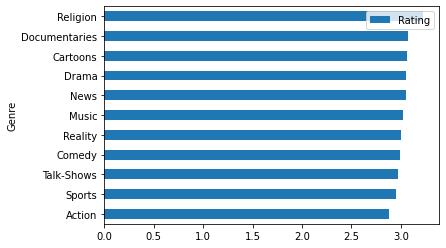

In [704]:
# Average rating by genre
TvData[['Rating','Genre']].groupby('Genre').mean().sort_values(by='Rating', ascending=True).plot.barh()
# pd.plotting.scatter_matrix(TvData[num_features], diagonal='kde')
plt.show()

In [705]:
# Top 10 Average rating by genre and plan 
TvData[['Rating', 'Plan','Genre']].groupby(['Genre', 'Plan']).mean().sort_values(by='Rating', ascending=False).head(10)

Rating
Genre         Plan             
Religion      Elite    3.407407
Music         Elite    3.237288
Cartoons      Elite    3.228571
Drama         Elite    3.207547
Religion      Premium  3.179487
              Basic    3.108108
Documentaries Premium  3.107843
Drama         Premium  3.088710
News          Premium  3.084000
Documentaries Basic    3.070175

In [706]:
## Lets Find the realtionship between them and Total_Viewing_Time

# for feature in cat_features:
# #     data=dataset.copy()
#     TvData.groupby(feature)['Total_Viewing_Time'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('Total_Viewing_Time')
#     plt.title(feature)
#     plt.show()

In [707]:
# sns.pairplot(data=TvData[cat_features + ['Satisfaction']], hue='Satisfaction')
# sns.catplot(data=TvData[cat_features], kind="count", palette="ch:.25")

# Lets Find the realtionship between them and Total_Viewing_Time
# cat_features = ['Gender', 'Genre','Format','Device','Plan']

# for feature in cat_features:
#     sns.catplot(data=TvData, x=feature, y='Age', palette="ch:.25", height=3, col='Satisfaction')
    
# plt.show()

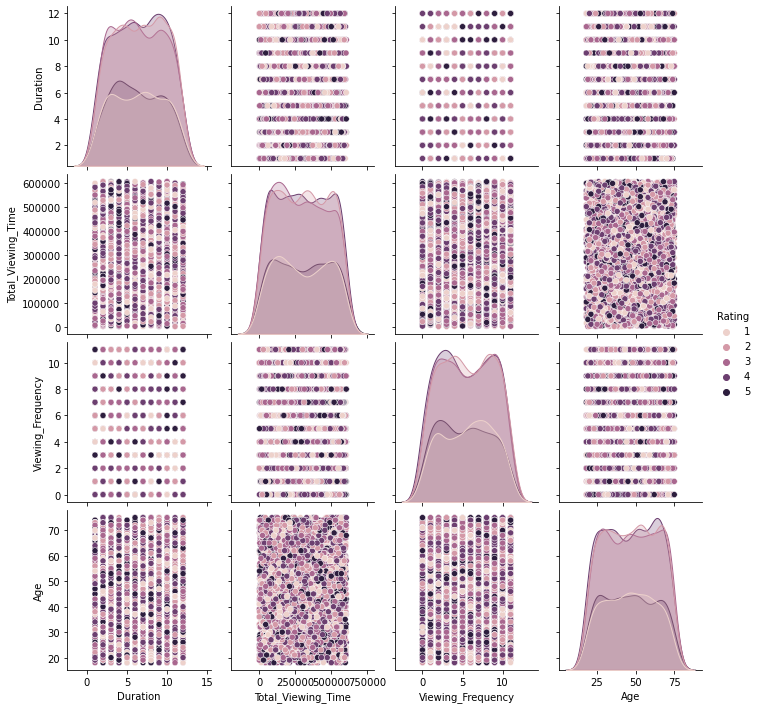

In [708]:
# sns.pairplot(data=TvData, hue='Plan', height=3)
sns.pairplot(data=TvData[num_features + ['Rating']], hue='Rating')
plt.show()

In [709]:
correlation = TvData.corr()
# correlation

<AxesSubplot:>

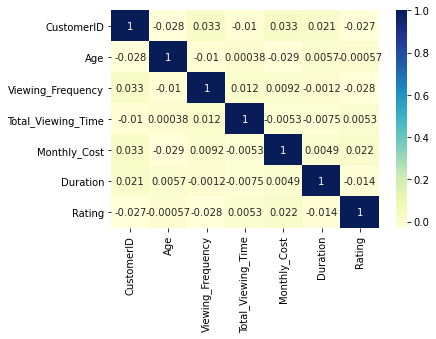

In [710]:
sns.heatmap(correlation, annot=True, cmap = 'YlGnBu')

In [711]:
# from scipy.stats import boxcox
# btr, lmbda = boxcox(TvData['Duration'])
# print(btr)
# print(lmbda)
# sns.distplot(btr, kde=True)

In [712]:
# TvData[['Rating','Genre']].groupby('Genre').mean().sort_values('Rating')

In [713]:
# TvData[['Device','Genre', 'Rating']].where(
#     TvData['Rating'] < 3
# ).groupby(['Device','Genre']).mean().sort_values('Rating')

# Data Preprocessing

## Feature Engineering

In [714]:
# Convert categorical features in dataset to 'category' type 
TvData[cat_features] = TvData[cat_features].astype("category")

In [715]:
# Verify minimum age
TvData.Age.min()

18

In [716]:
# Generate age groups from the age feature

bins = [18,31,49,60,125]
labels = ["Young Adult","Middle Aged","Old Adult","Elderly"]
TvData["Age_Group"] = pd.cut(TvData["Age"], bins = bins ,labels = labels, right = False)

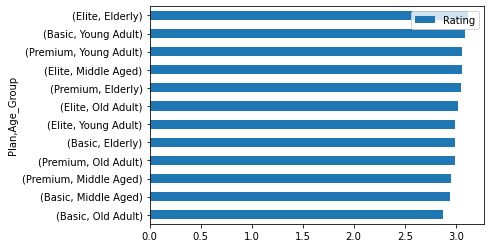

In [717]:
# Check average rating by plan and age group
TvData[['Rating', 'Plan','Age_Group']].groupby(['Plan', 'Age_Group']).mean().sort_values(by='Rating', ascending=True).plot.barh()
plt.show()

In [718]:
TvData[['Rating']].value_counts()

Rating
4         1259
2         1239
3         1218
5          649
1          627
dtype: int64

In [719]:
# Generate satisfied from customer rating feature
rating_dict = {1:'Low', 2:'Low', 3:'Neutral', 4:'High', 5:'High'}
TvData['Satisfaction'] = TvData['Rating'].map(rating_dict)

In [720]:
TvData.sample(5)

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating,Age_Group,Satisfaction
4529,224,Beverly Laouali,68,Male,Adamawa,Reality,TV-Shows,Decoder,5,568488,Basic,2500,5,2,Elderly,Low
3327,1905,Kai Sofoluwe,42,Female,Rivers,News,TV-Shows,Tv-App,1,599512,Premium,5000,3,5,Middle Aged,High
3445,2586,Kessie Ihemeje,68,Female,Bauchi,Documentaries,Live-Events,Decoder,1,338060,Elite,10000,5,5,Elderly,High
309,310,Mariam Idonije,69,Male,Nasarawa,News,Live-Events,Tv-App,9,326550,Premium,5000,9,1,Elderly,Low
2710,2711,Brenda Umelo,37,Female,Jigawa,Action,Live-Events,Decoder,3,177022,Basic,2500,2,2,Middle Aged,Low


In [753]:
# Define the input features and target 

X = TvData.drop(columns = ['CustomerID','Name','Age', 'Monthly_Cost','Rating', 'Satisfaction'])
y = TvData['Satisfaction']

In [722]:
X.sample(2)

,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Duration,Age_Group
861,Male,Cross River,Cartoons,Live-Events,Browser,4,511484,Basic,3,Middle Aged
3760,Female,Abuja,Talk-Shows,TV-Shows,Mobile-App,10,19510,Premium,11,Elderly


In [723]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              4992 non-null   category
 1   State               4992 non-null   category
 2   Genre               4992 non-null   category
 3   Format              4992 non-null   category
 4   Device              4992 non-null   category
 5   Viewing_Frequency   4992 non-null   int64   
 6   Total_Viewing_Time  4992 non-null   int64   
 7   Plan                4992 non-null   category
 8   Duration            4992 non-null   int64   
 9   Age_Group           4992 non-null   category
dtypes: category(7), int64(3)
memory usage: 352.7 KB


### Feature Encoding

In [724]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [725]:
# # Encode input features
# def prepare_inputs(X_train, X_test):
#     X_train_enc = pd.get_dummies(X_train, columns=categorical_features)
#     X_test_enc = pd.get_dummies(X_test, columns=categorical_features)
#     return X_train_enc, X_test_enc

# Encode the target feature
# def prepare_targets(y_train, y_test):
#     le = LabelEncoder()
#     le.fit(y_train)
#     y_train_enc = le.transform(y_train)
#     y_test_enc = le.transform(y_test)
#     return y_train_enc, y_test_enc

# OneHotEncoder(handle_unknown='ignore', sparse=False)
# oh_encoder = OneHotEncoder(dtype=np.int, handle_unknown='ignore', sparse=False)
# # oh_cols_train = oh_encoder.fit_transform(X[categorical_features])
# a = pd.DataFrame(oh_encoder.fit_transform(X[X.select_dtypes(include="category").columns]))
# a.columns = oh_encoder.get_feature_names(X.select_dtypes(include="category").columns)
# a.head()

In [754]:
# Categorical features 
categorical = X.select_dtypes(include="category").columns

cat_encoder = OneHotEncoder(dtype=np.int, handle_unknown='ignore', sparse=False)

# Encode the categorical features(columns) and generate appropriate column names
cat_df = pd.DataFrame(cat_encoder.fit_transform(X[categorical]), index=X.index)
cat_df.columns = cat_encoder.get_feature_names(categorical)
# cat_df.columns
cat_df.tail()

,Gender_Female,Gender_Male,State_Abia,State_Abuja,State_Adamawa,State_Akwa Ibom,State_Anambra,State_Bauchi,State_Bayelsa,State_Benue,...,Device_Decoder,Device_Mobile-App,Device_Tv-App,Plan_Basic,Plan_Elite,Plan_Premium,Age_Group_Elderly,Age_Group_Middle Aged,Age_Group_Old Adult,Age_Group_Young Adult
4987,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4988,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4989,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4990,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4991,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [755]:
# # Join the new dataframe to our original data
X = X.join(cat_df)

# X.shape

In [758]:
# Drop the categorical columns
X = X.drop(columns = categorical)

In [759]:
X.shape

(4992, 66)

In [760]:
# Encode the target feature
target_enc = LabelEncoder()

y = target_enc.fit_transform(y)

# target_enc.inverse_transform([0,2,1])

### Feature Scaling

In [761]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# input_scaler = StandardScaler()
input_scaler = MinMaxScaler() 

In [762]:
# Numerical features(columns) in the dataset
numerical = X.select_dtypes(include="number").columns

X[numerical] = input_scaler.fit_transform(X[numerical])

# X.head()

In [765]:
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# X_train, X_test = prepare_inputs(X_train, X_test)
# y_train, y_test = prepare_targets(y_train, y_test)

In [764]:
# len(X_train.columns)


In [ ]:
# X_train_scaled = scaler.fit_transform(X_train_enc)
# X_test_scaled = scaler.transform(X_test_enc)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Split the Data

In [766]:
from sklearn.model_selection import train_test_split

In [767]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [768]:
# y_train.value_counts()

In [769]:
# y_test.value_counts()

In [770]:
# X_train.head()

### Feature importance

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Use Random Forest Classifier to perform feature ranking/selection
clf_rf = RandomForestClassifier()
selector = RFE(estimator = clf_rf)

# selector = selector.fit(X_train_scaled, y_train_enc)
selector = selector.fit(X_train, y_train)

In [ ]:
# print("Selected best features: ", X_train_enc.columns[selector.support_])
print("Selected best features: ", X_train.columns[selector.support_])
# selector.ranking_

In [ ]:
# TvData.columns

In [ ]:
#  Use selected columns
# X_train = X_train[X_train.columns[selector.support_]]
# X_test = X_test[X_test.columns[selector.support_]]

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# # scaler = StandardScaler()
# scaler = MinMaxScaler() 

In [ ]:
# X_train_scaled = scaler.fit_transform(X_train_enc)
# X_test_scaled = scaler.transform(X_test_enc)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# X_test_scaled

# Prediction

In [771]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import classification_report, roc_auc_score

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [784]:
# Evaluate model using classification report
def modelEval(model):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
#     auc_score = roc_auc_score(y_test, y_pred, multi_class='ovo')
    # auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')
    
#     print("AUC_ROC", auc_score)
    print("Score: ", score)
    print(classification_report(y_test, y_pred), '\n')

In [785]:
models = [
    RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42),
    DecisionTreeClassifier(max_depth=50, random_state=42),
    LogisticRegression(solver='liblinear', random_state=42),
    GaussianNB(),
    XGBClassifier(n_estimators=500, max_depth=50, random_state=42),
    LGBMClassifier(n_estimators=500, max_depth=50, random_state=42)
]

In [786]:
for model in models:
    modelEval(model)

Score:  0.35496794871794873
              precision    recall  f1-score   support

           0       0.37      0.44      0.40       477
           1       0.36      0.46      0.41       467
           2       0.20      0.05      0.08       304

    accuracy                           0.35      1248
   macro avg       0.31      0.32      0.30      1248
weighted avg       0.33      0.35      0.33      1248
 

Score:  0.3229166666666667
              precision    recall  f1-score   support

           0       0.37      0.36      0.37       477
           1       0.33      0.34      0.34       467
           2       0.24      0.23      0.23       304

    accuracy                           0.32      1248
   macro avg       0.31      0.31      0.31      1248
weighted avg       0.32      0.32      0.32      1248
 

Score:  0.3557692307692308
              precision    recall  f1-score   support

           0       0.36      0.46      0.40       477
           1       0.36      0.47      0.41

In [787]:
# print(y_pred)

In [788]:
# print(y_test)

## Hyperparameter Tuning

In [789]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# from sklearn.linear_model import SGDClassifier

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

#### Random Forest Classifier 

In [790]:
rf_model = RandomForestClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the parameter distributions
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 50)],
               'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(start = 1, stop = 20)],
               'min_samples_split': [2, 10],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# define search
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, n_iter=20, param_distributions = param_dist, cv = cv,  n_jobs=-1)

# execute search
result = rf_RandomGrid.fit(X_train, y_train)

# summarize result
print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Train Accuracy - : 0.638
Test Accuracy - : 0.381 

Best Score: 0.38719873675893457
Best Hyperparameters: {'n_estimators': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True}


#### Logistic Regression Classifier

In [791]:
lr_model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the parameter distributions
param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100)
}

# define search
lr_RandomGrid = RandomizedSearchCV(estimator = lr_model, n_iter=10, param_distributions = param_dist, cv=cv,  n_jobs=-1)

# execute search
result = lr_RandomGrid.fit(X_train, y_train)

# summarize result
print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Train Accuracy - : 0.425
Test Accuracy - : 0.356 

Best Score: 0.3841668868056994
Best Hyperparameters: {'C': 55.20465489617383, 'penalty': 'l1', 'solver': 'liblinear'}


### Evaluate Improved Models

In [792]:
lr_model = LogisticRegression(C = 55.20465489617383, penalty = 'l1', solver = 'liblinear')

modelEval(lr_model)

Score:  0.3557692307692308
              precision    recall  f1-score   support

           0       0.36      0.46      0.40       477
           1       0.36      0.47      0.41       467
           2       0.18      0.02      0.04       304

    accuracy                           0.36      1248
   macro avg       0.30      0.32      0.28      1248
weighted avg       0.32      0.36      0.32      1248
 



In [795]:
rf_model = RandomForestClassifier(n_estimators=28, max_features='sqrt', max_depth=9, bootstrap= True, random_state=42)

modelEval(rf_model)

Score:  0.3645833333333333
              precision    recall  f1-score   support

           0       0.37      0.49      0.42       477
           1       0.37      0.47      0.42       467
           2       0.00      0.00      0.00       304

    accuracy                           0.36      1248
   macro avg       0.25      0.32      0.28      1248
weighted avg       0.28      0.36      0.32      1248
 



# Prepare Model for Deployment

In [797]:
# Import necessary libraries
import pickle

In [798]:
# Create a pickle file of model, scacler and the encoders using serializtion

# save the model
# dump(model, open('model.pkl', 'wb'))
with open('model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(input_scaler, file)
    
# save the target encoder
with open('label_enc.pkl', 'wb') as file:
    pickle.dump(target_enc, file)

# save the category encoder
with open('cat_encoder.pkl', 'wb') as file:
    pickle.dump(cat_encoder, file)
    


    
# dump(scaler, open('scaler.pkl', 'wb'))
# pickle_out = open(model_file, "wb")
# pickle.dump(rf_model, pickle_out)
# pickle_out.close()

In [810]:
cat_encoder.transform(['Akwa Ibom'].reshape(-1, 1))

AttributeError: 'list' object has no attribute 'reshape'